In [ ]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['superstore.xls']))

Saving superstore.xls to superstore (2).xls


In [ ]:
df.loc[2][1]

'CA-2016-138688'

In [ ]:
df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
df2 = df
df2= df2.sort_values(by=['OrderDate'], axis=0, ascending=False)


df2 = df2.loc[(df2['OrderDate'] >= df2['OrderDate'].max() + dt.timedelta(-30)) & (df2['OrderDate'] <= df2['OrderDate'].max())]
#df2 = df.loc[lastdayfrom - pd.Timedelta(days=30):lastdayfrom].reset_index()
df2

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
906,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176
907,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
1296,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
1297,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
645,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,3070,US-2017-120089,2017-11-30,2017-11-30,Same Day,ML-17755,Max Ludwig,Home Office,United States,Toledo,Ohio,43615,East,OFF-AP-10003779,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece Power Center w...,663.936,4,0.2,82.9920
5586,5587,CA-2017-105333,2017-11-30,2017-12-04,Standard Class,VP-21730,Victor Preis,Home Office,United States,New York City,New York,10011,East,OFF-ST-10001809,Office Supplies,Storage,Fellowes Officeware Wire Shelving,269.490,3,0.0,5.3898
5585,5586,CA-2017-105333,2017-11-30,2017-12-04,Standard Class,VP-21730,Victor Preis,Home Office,United States,New York City,New York,10011,East,TEC-PH-10001468,Technology,Phones,Panasonic Business Telephones KX-T7736,546.060,3,0.0,163.8180
955,956,CA-2017-119305,2017-11-30,2017-12-04,Standard Class,SW-20275,Scott Williamson,Consumer,United States,Jackson,Mississippi,39212,South,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,173.800,5,0.0,43.4500


In [ ]:
df2.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
906,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176
907,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
1296,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
1297,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
645,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110


In [ ]:
filtered_data=df2[['Country','CustomerID']] #instead of drop duplicates, keep the pandas
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 906 to 880
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         477 non-null    int64         
 1   OrderID       477 non-null    object        
 2   OrderDate     477 non-null    datetime64[ns]
 3   ShipDate      477 non-null    datetime64[ns]
 4   ShipMode      477 non-null    object        
 5   CustomerID    477 non-null    object        
 6   CustomerName  477 non-null    object        
 7   Segment       477 non-null    object        
 8   Country       477 non-null    object        
 9   City          477 non-null    object        
 10  State         477 non-null    object        
 11  PostalCode    477 non-null    int64         
 12  Region        477 non-null    object        
 13  ProductID     477 non-null    object        
 14  Category      477 non-null    object        
 15  Sub-Category  477 non-null    object  

In [ ]:
df2.describe()

,RowID,PostalCode,Sales,Quantity,Discount,Profit
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,4853.876310,54729.675052,189.674216,3.737945,0.146164,17.888612
std,2947.124782,32255.730284,346.695808,2.191582,0.202359,175.905356
min,76.000000,1841.000000,1.188000,1.000000,0.000000,-2929.484500
25%,2349.000000,19711.000000,17.280000,2.000000,0.000000,2.458200
50%,4923.000000,53711.000000,52.776000,3.000000,0.000000,8.488800
75%,7518.000000,90004.000000,182.550000,5.000000,0.200000,29.245000
max,9970.000000,98208.000000,2879.952000,14.000000,0.800000,1007.983200


In [ ]:
df2 = df2[(df2['Quantity']>0)] #주문 안한 건수 제거
df2['OrderDate'] = pd.to_datetime(df2['OrderDate'],infer_datetime_format=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 906 to 880
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         477 non-null    int64         
 1   OrderID       477 non-null    object        
 2   OrderDate     477 non-null    datetime64[ns]
 3   ShipDate      477 non-null    datetime64[ns]
 4   ShipMode      477 non-null    object        
 5   CustomerID    477 non-null    object        
 6   CustomerName  477 non-null    object        
 7   Segment       477 non-null    object        
 8   Country       477 non-null    object        
 9   City          477 non-null    object        
 10  State         477 non-null    object        
 11  PostalCode    477 non-null    int64         
 12  Region        477 non-null    object        
 13  ProductID     477 non-null    object        
 14  Category      477 non-null    object        
 15  Sub-Category  477 non-null    object  

In [ ]:
df2=df2[['CustomerID','OrderDate','OrderID','Quantity','Sales','Profit']]
PRESENT = dt.datetime(2017,12,31)#present check 할 것


In [ ]:
df_group=df2.groupby('OrderDate').agg({'OrderDate': lambda date: -(PRESENT - date.max()).days,'CustomerID': lambda num: len(num),
                                        'OrderID': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'Sales': lambda price: price.sum(),'Profit': lambda price: price.sum()})

In [ ]:
df2.head()

,CustomerID,OrderDate,OrderID,Quantity,Sales,Profit
906,PO-18865,2017-12-30,CA-2017-143259,4,323.136,12.1176
907,PO-18865,2017-12-30,CA-2017-143259,7,90.930,2.7279
1296,EB-13975,2017-12-30,CA-2017-115427,2,13.904,4.5188
1297,EB-13975,2017-12-30,CA-2017-115427,2,20.720,6.4750
645,CC-12430,2017-12-30,CA-2017-126221,2,209.300,56.5110


In [ ]:
df_group.columns=['Day Passed','customer/day','num_transactions','num_units','spent_money','Profit']
df_group.head(10000)

,Day Passed,customer/day,num_transactions,num_units,spent_money,Profit
OrderDate,,,,,,
2017-11-30,-31,15,15,60,6645.2820,49.5212
2017-12-01,-30,34,34,149,5331.1780,718.8920
2017-12-02,-29,34,34,152,9951.1820,-7.3410
2017-12-03,-28,20,20,70,1403.8420,280.7407
2017-12-04,-27,18,18,64,2639.6380,-21.9881
2017-12-05,-26,19,19,75,1453.1360,447.6235
2017-12-06,-25,1,1,1,10.6800,2.8836
2017-12-07,-24,9,9,36,2916.5140,-2686.6673
2017-12-08,-23,30,30,114,7643.0410,1154.6045


In [ ]:
df_group['avg_order_value']=df_group['spent_money']/df_group['num_transactions']


In [ ]:
df_group.head()

,Day Passed,customer/day,num_transactions,num_units,spent_money,Profit,avg_order_value
OrderDate,,,,,,,
2017-11-30,-31,15,15,60,6645.282,49.5212,443.018800
2017-12-01,-30,34,34,149,5331.178,718.8920,156.799353
2017-12-02,-29,34,34,152,9951.182,-7.3410,292.681824
2017-12-03,-28,20,20,70,1403.842,280.7407,70.192100
2017-12-04,-27,18,18,64,2639.638,-21.9881,146.646556


In [ ]:
purchase_frequency=sum(df_group['num_transactions'])/df_group.shape[0]
#리서치한 수식을 이용했습니다. ARPU(지금 코드에서는 daily basis로 계산 되어있습니다)
#각 날짜별로 유니크 주문 건수를 계산해서 이걸 전체 고객 수로 나누게 되면 전체 고객의 펑균 주문빈도가 나와요.
#이걸로 보게되면 모든 유저를 대상으로한 LTV계산이 가능할거라 생각했어요.

In [ ]:
repeat_rate=df_group[df_group.num_transactions > 1].shape[0]/df_group.shape[0]
churn_rate=1-repeat_rate #churn rate는 이탈율 이므로 1에서 repeat rate을 뺀 값.

In [ ]:
purchase_frequency,repeat_rate,churn_rate

(15.9, 0.9666666666666667, 0.033333333333333326)

In [ ]:
#LTV를 매출로 계산했을 때
df_group['LTV_S']=(df_group['spent_money']*purchase_frequency)/churn_rate #this is the LTV calculation

#LTV를 이익으로 계산했을 때
df_group['LTV_P']=(df_group['Profit']*purchase_frequency)/churn_rate


In [ ]:
df_group.head()


,Day Passed,customer/day,num_transactions,num_units,spent_money,Profit,avg_order_value,LTV_S,LTV_P
OrderDate,,,,,,,,,
2017-11-30,-31,15,15,60,6645.282,49.5212,443.018800,3169799.514,23621.6124
2017-12-01,-30,34,34,149,5331.178,718.8920,156.799353,2542971.906,342911.4840
2017-12-02,-29,34,34,152,9951.182,-7.3410,292.681824,4746713.814,-3501.6570
2017-12-03,-28,20,20,70,1403.842,280.7407,70.192100,669632.634,133913.3139
2017-12-04,-27,18,18,64,2639.638,-21.9881,146.646556,1259107.326,-10488.3237


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7faf9158dd10>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7faf915963d0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]


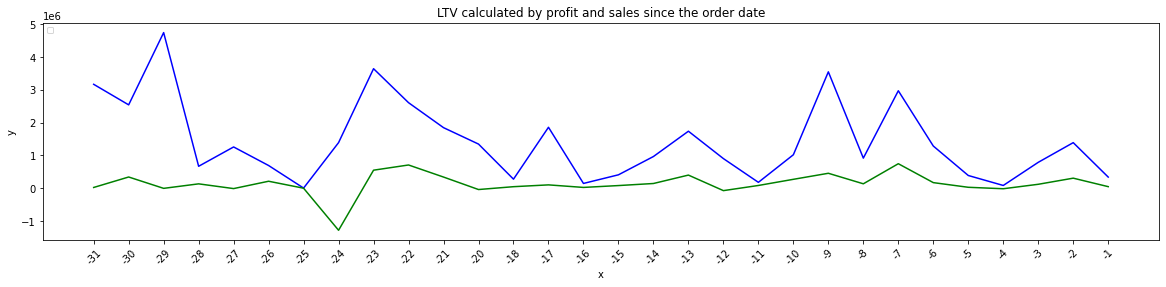

In [ ]:
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np


df_group['time'] = df_group['Day Passed'].astype(str)
time = df_group['time'].to_numpy()
ltvs = df_group['LTV_S']
ltvp = df_group['LTV_P']
LTVS = plt.plot(time, ltvs, color ='b')
LTVP = plt.plot(time, ltvp, color ='g')
plt.legend((LTVS,LTVP),('LTV_S','LTV_P'),scatterpoints=1, loc='upper left', ncol=3, fontsize =8)
plt.title("LTV calculated by profit and sales since the order date")

plt.xlabel('x')
plt.xticks(rotation=45)
plt.ylabel('y')
fig = plt.gcf()
fig.set_figwidth(20)
ax=plt.gca()
ax.set_facecolor('w')
plt.show()